# DATA-DRIVEN LOAN APPROVAL: A MACHINE LEARNING APPROACH

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [84]:
# Load the dataset
data = pd.read_csv(r"C:\Users\DELL\Desktop\Loan_filtered.csv")
data.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2019-11-01   53         42478          552         Employed   
1      2019-11-02   54         25911          571         Employed   
2      2019-11-03   18         27112          432         Employed   
3      2019-11-04   35         54015          612         Employed   
4      2019-11-05   35         32033          585         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          33       10463            72       Widowed  ...   
1      Associate          28       10751            60        Single  ...   
2         Master           0       32743            72      Divorced  ...   
3    High School          14       13313            60        Single  ...   
4       Bachelor          10       24194            12      Divorced  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3539.833333                   0.972212          7      5996   
1    2159.250000                   0.841848          5      5576   
2    2259.333333                   0.794940          4     40446   
3    4501.250000                   0.754604          4     77419   
4    2669.416667                   0.910957          5     47295   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.249463      0.221873          264.059369                0.243249   
1          0.230251      0.244892          312.344769                0.396594   
2          0.331743      0.378836         1157.134465                0.875539   
3          0.212313      0.202899          354.864257                0.145041   
4          0.196694      0.225888         2271.284384                0.963988   

  LoanApproved  RiskScore  
0            0       53.0  
1            0       56.0  
2            0       57.0  
3            0       48.0  
4            0       56.0  

[5 rows x 36 columns]

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19500 non-null  object 
 1   Age                         19500 non-null  int64  
 2   AnnualIncome                19500 non-null  int64  
 3   CreditScore                 19500 non-null  int64  
 4   EmploymentStatus            19500 non-null  object 
 5   EducationLevel              19500 non-null  object 
 6   Experience                  19500 non-null  int64  
 7   LoanAmount                  19500 non-null  int64  
 8   LoanDuration                19500 non-null  int64  
 9   MaritalStatus               19500 non-null  object 
 10  NumberOfDependents          19500 non-null  int64  
 11  HomeOwnershipStatus         19500 non-null  object 
 12  MonthlyDebtPayments         19500 non-null  int64  
 13  CreditCardUtilizationRate   195

In [88]:
data.describe()

Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  19500.000000   19500.000000  19500.000000  19500.000000   19500.000000   
mean      39.775949   59508.290359    571.675744     17.545026   24827.464821   
std       11.622545   40626.230757     51.044964     11.317029   13401.580257   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31869.000000    540.000000      9.000000   15526.750000   
50%       40.000000   48868.500000    578.000000     17.000000   21874.000000   
75%       48.000000   74875.250000    609.000000     25.000000   30777.500000   
max       80.000000  485341.000000    712.000000     60.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  19500.000000        19500.000000         19500.000000   
mean      54.067077            1.517179           454.181692   
std       24.626980            1.385921           240.582768   
min       12.000000            0.000000            50.000000   
25%       36.000000            0.000000           286.000000   
50%       48.000000            1.000000           402.000000   
75%       72.000000            2.000000           564.000000   
max      120.000000            5.000000          2919.000000   

       CreditCardUtilizationRate  NumberOfOpenCreditLines  ...  MonthlyIncome  \
count               19500.000000             19500.000000  ...   19500.000000   
mean                    0.286603                 3.021897  ...    4920.249487   
std                     0.159773                 1.735433  ...    3318.661505   
min                     0.000974                 0.000000  ...    1250.000000   
25%                     0.161217                 2.000000  ...    2641.270833   
50%                     0.266862                 3.000000  ...    4054.375000   
75%                     0.390975                 4.000000  ...    6197.666667   
max                     0.917380                13.000000  ...   25000.000000   

       UtilityBillsPaymentHistory     JobTenure      NetWorth  \
count                19500.000000  19500.000000  1.950000e+04   
mean                     0.800012      5.000872  7.261325e+04   
std                      0.120845      2.235770  1.186811e+05   
min                      0.259203      0.000000  1.000000e+03   
25%                      0.727352      3.000000  8.744750e+03   
50%                      0.821036      5.000000  3.289450e+04   
75%                      0.892594      6.000000  8.920150e+04   
max                      0.999433     16.000000  2.603208e+06   

       BaseInterestRate  InterestRate  MonthlyLoanPayment  \
count      19500.000000  19500.000000        19500.000000   
mean           0.239045      0.238938          908.592842   
std            0.035484      0.042148          672.136909   
min            0.130101      0.113310           97.030193   
25%            0.213828      0.209023          492.417765   
50%            0.236110      0.235275          725.994571   
75%            0.261530      0.265387         1110.297861   
max            0.405029      0.446787        10892.629520   

       TotalDebtToIncomeRatio  LoanApproved     RiskScore  
count            19500.000000  19500.000000  19500.000000  
mean                 0.399653      0.245128     50.686338  
std                  0.337564      0.430174      7.817191  
min                  0.016043      0.000000     28.800000  
25%                  0.178227      0.000000     46.000000  
50%                  0.300273      0.000000     52.000000  
75%                  0.507168      0.000000     56.000000  
max                  4.647657      1.000000     84.000000  

[8 rows x 30 columns]

In [90]:
print(data.isnull().sum())

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

### Dropping Application Date 

In [93]:
#dropping date 
data=data.drop(['ApplicationDate'],axis=1)

In [95]:
# List of categorical columns
categorical_columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus','HomeOwnershipStatus', 'LoanPurpose']
#List of numerical columns
numerical_columns = ["Age","AnnualIncome","CreditScore","Experience","LoanAmount","LoanDuration","NumberOfDependents","MonthlyDebtPayments",
                     "CreditCardUtilizationRate","NumberOfOpenCreditLines","NumberOfCreditInquiries","DebtToIncomeRatio","BankruptcyHistory",
                     "PreviousLoanDefaults","PaymentHistory","LengthOfCreditHistory","SavingsAccountBalance","CheckingAccountBalance","TotalAssets",
                     "TotalLiabilities","MonthlyIncome","UtilityBillsPaymentHistory","JobTenure","NetWorth","BaseInterestRate","InterestRate",
                     "MonthlyLoanPayment","TotalDebtToIncomeRatio","RiskScore","LoanApproved"]

### Visualization of loan approval

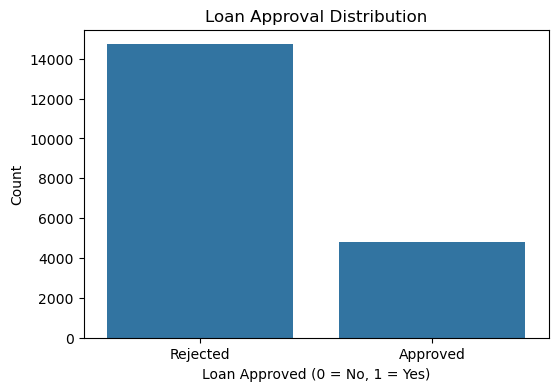

In [98]:
plt.figure(figsize=(6, 4))
sns.countplot(x='LoanApproved', data=data)
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.show()

## HISTOGRAM OF LOAN APPROVAL AND NUMERICAL FEATURES

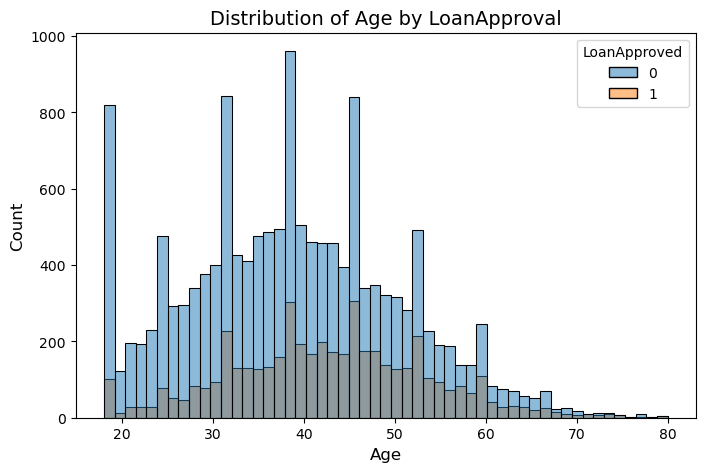

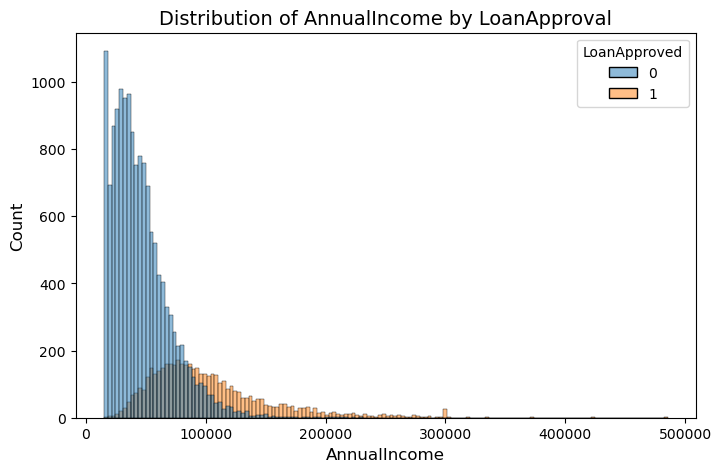

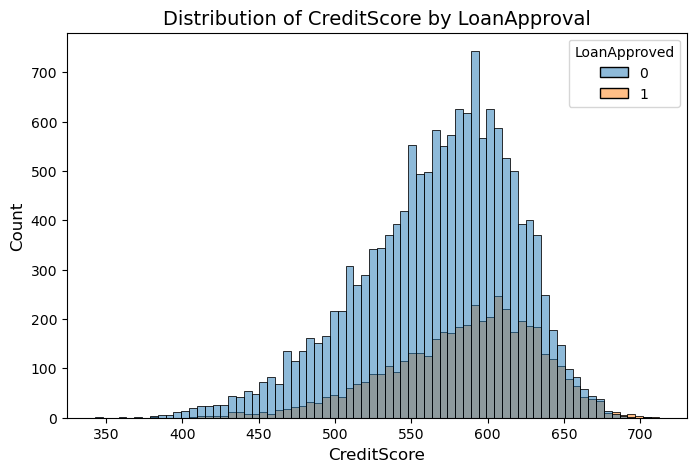

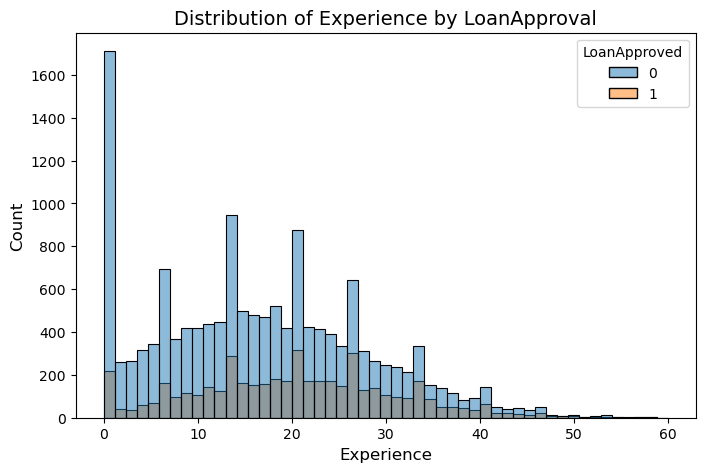

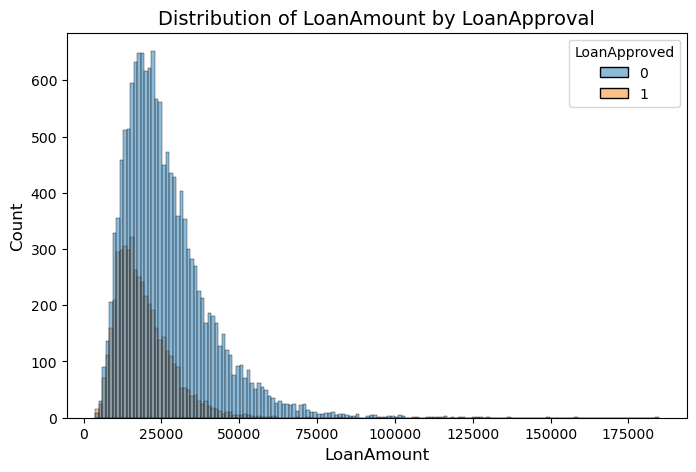

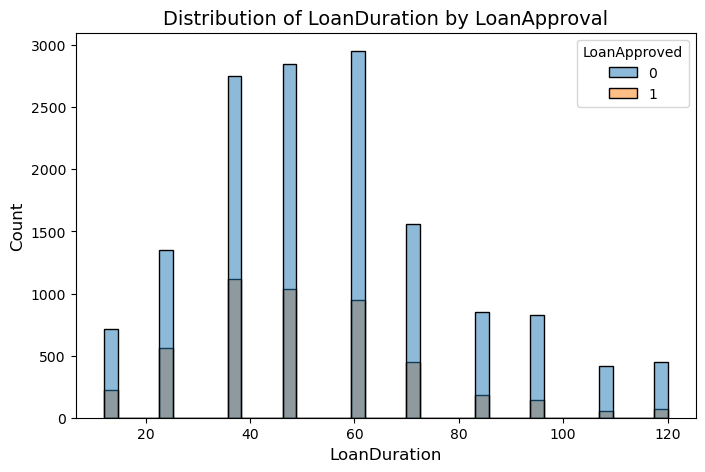

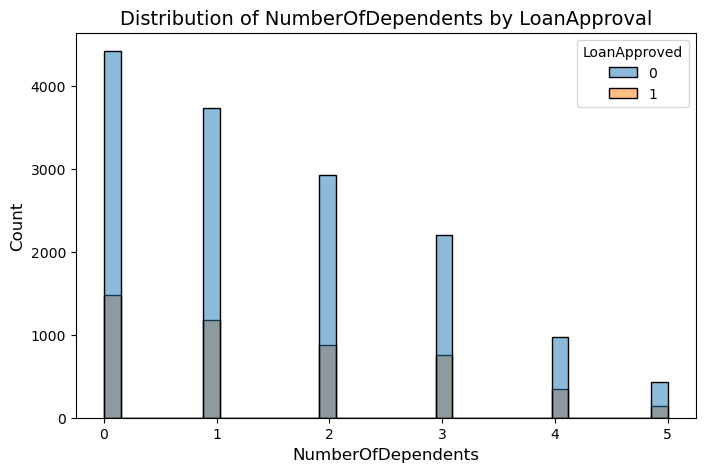

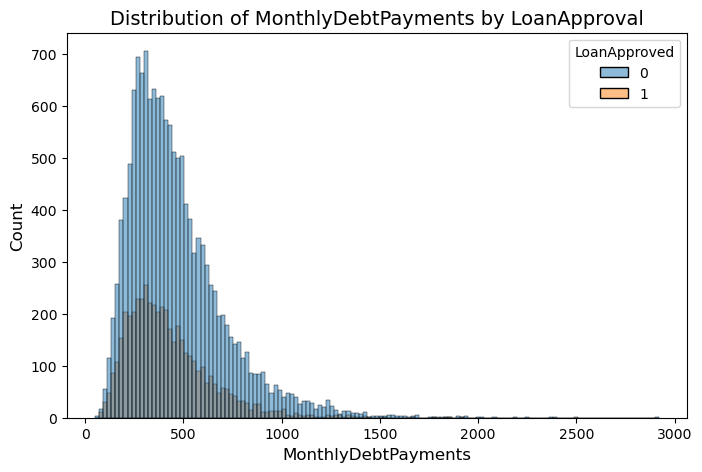

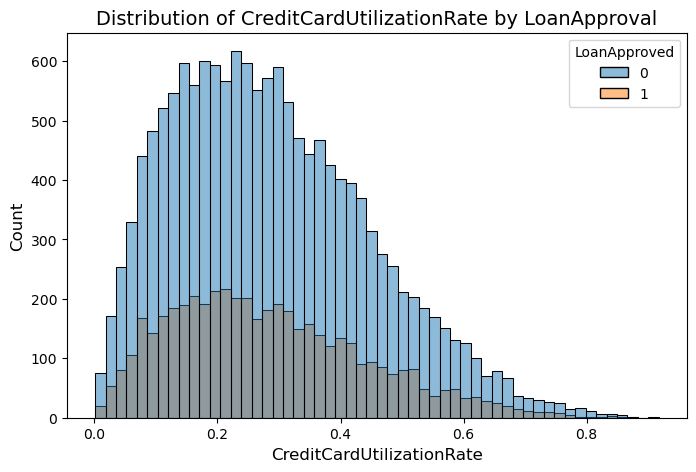

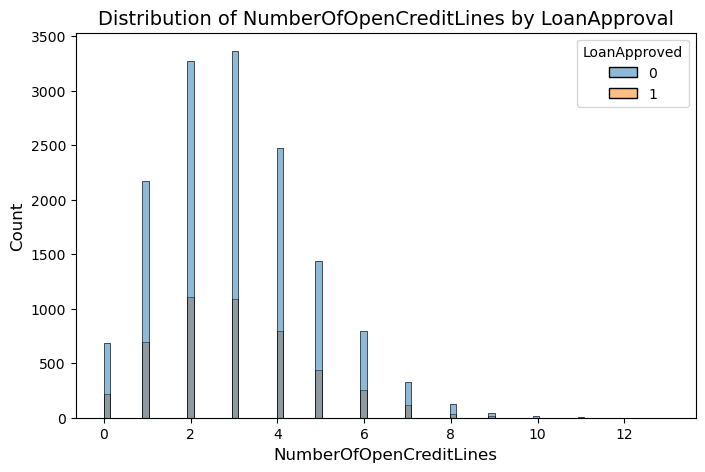

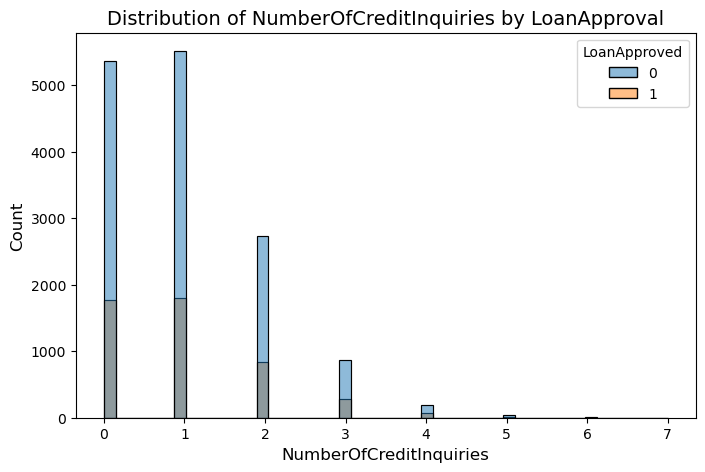

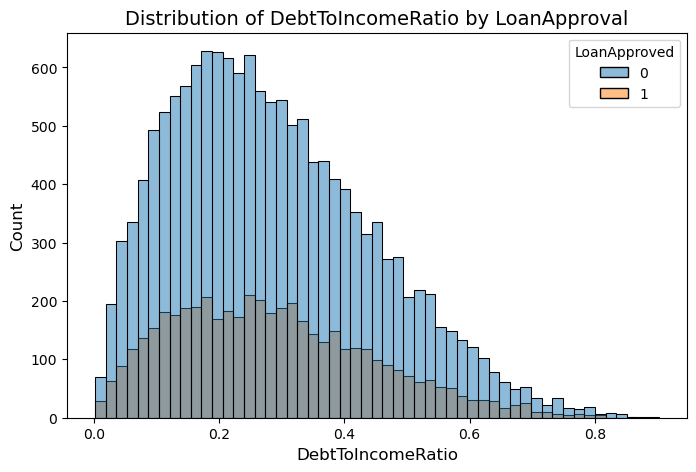

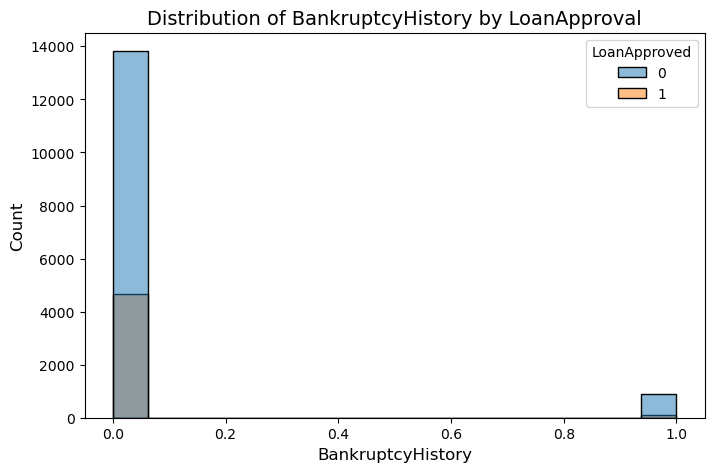

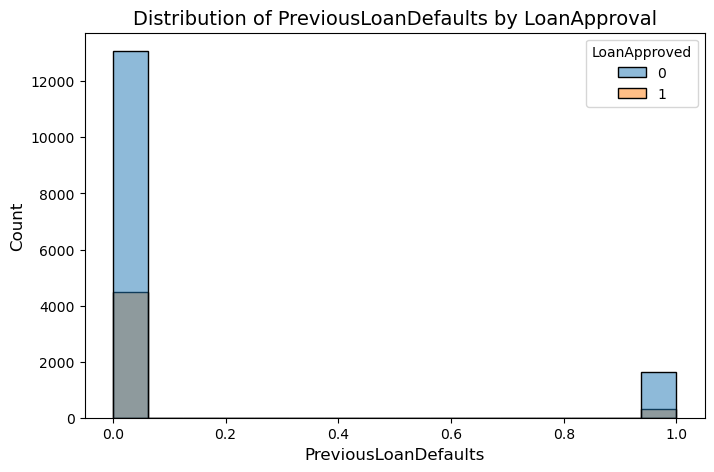

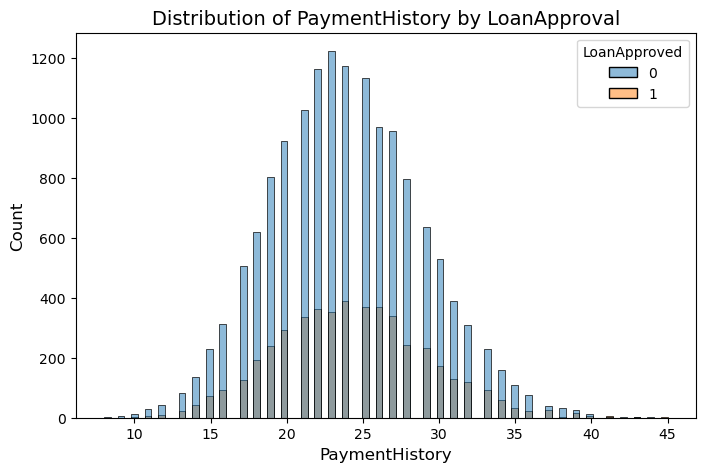

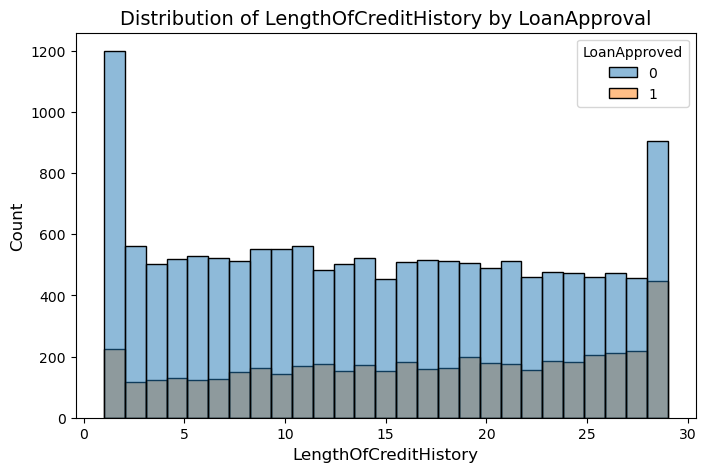

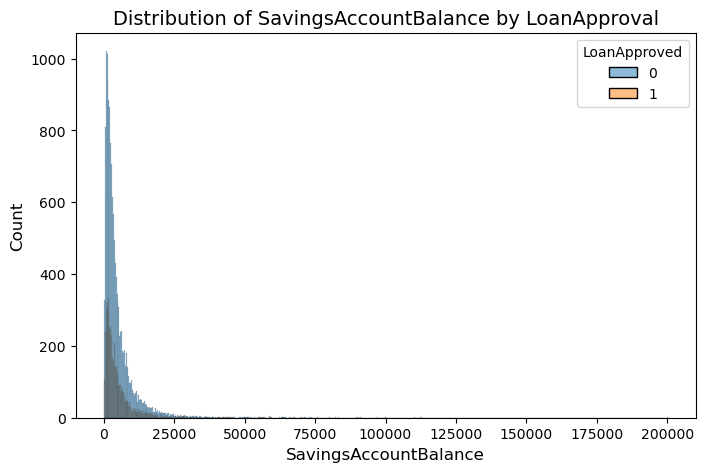

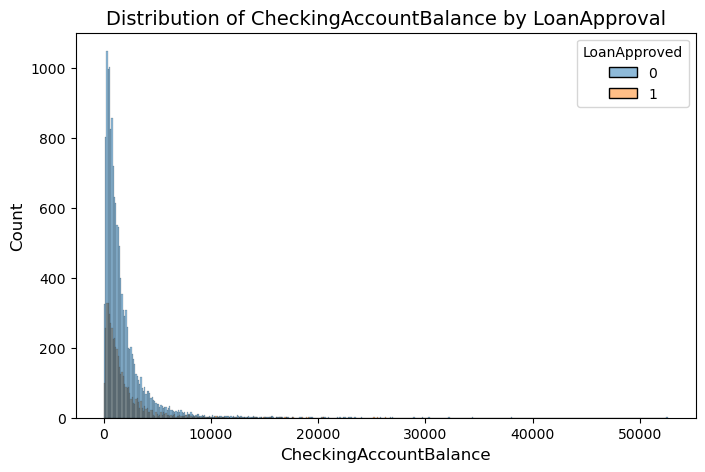

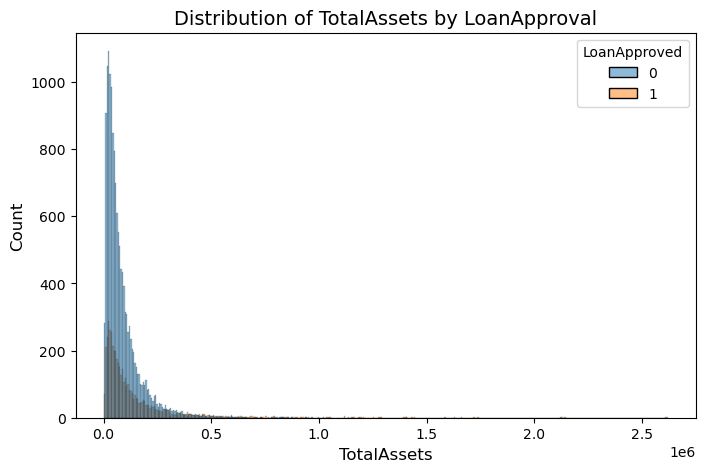

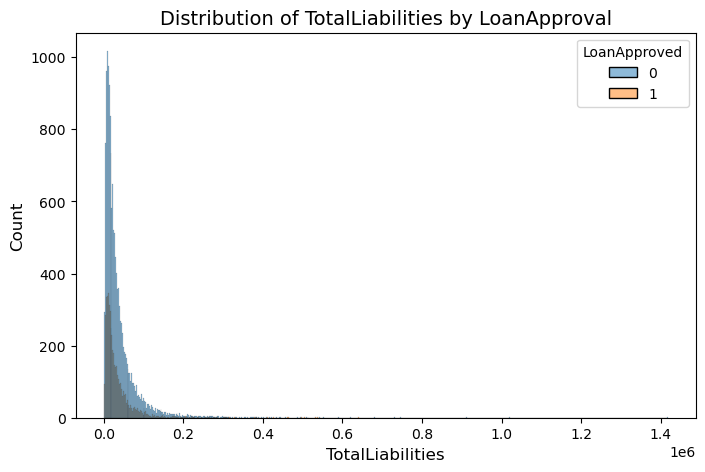

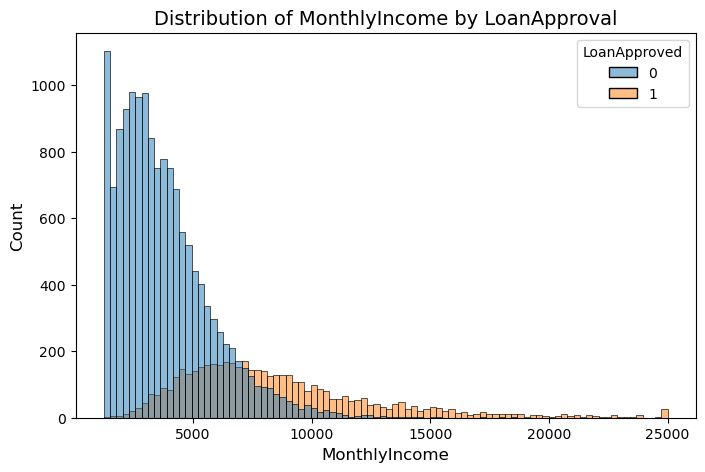

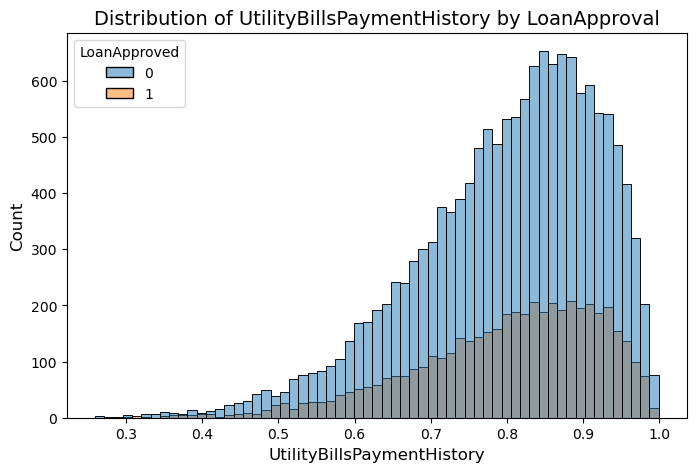

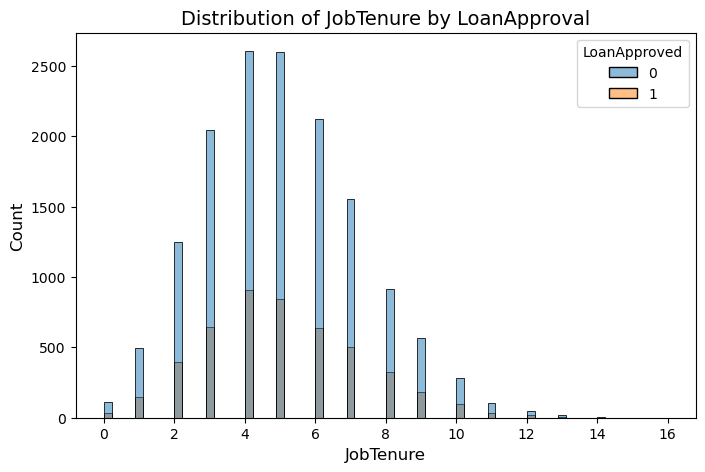

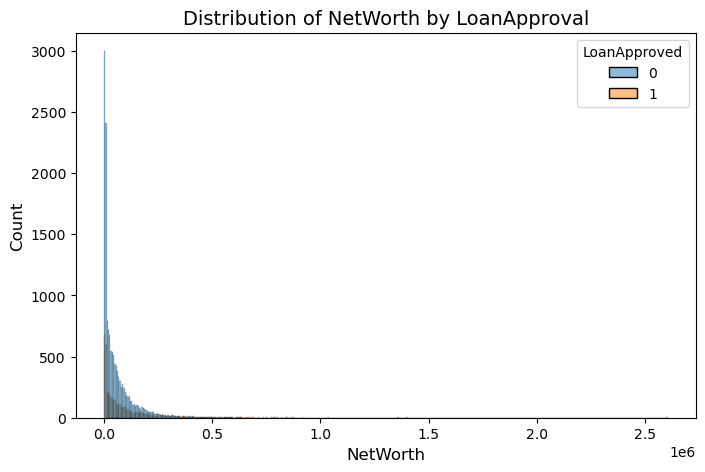

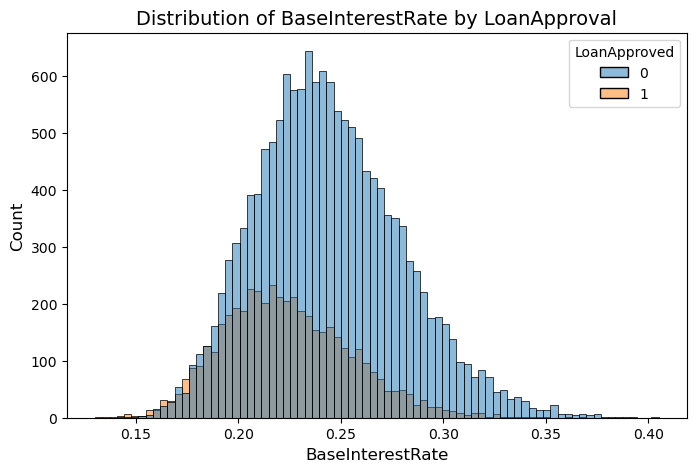

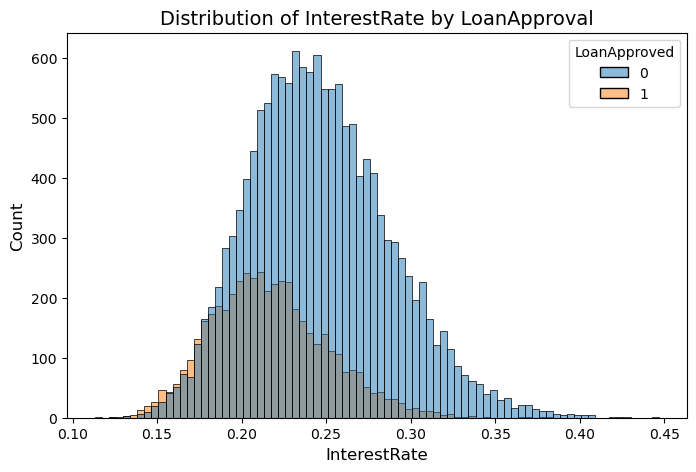

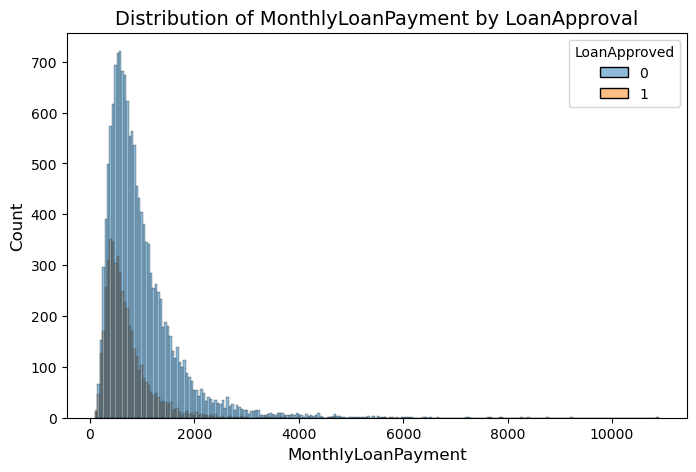

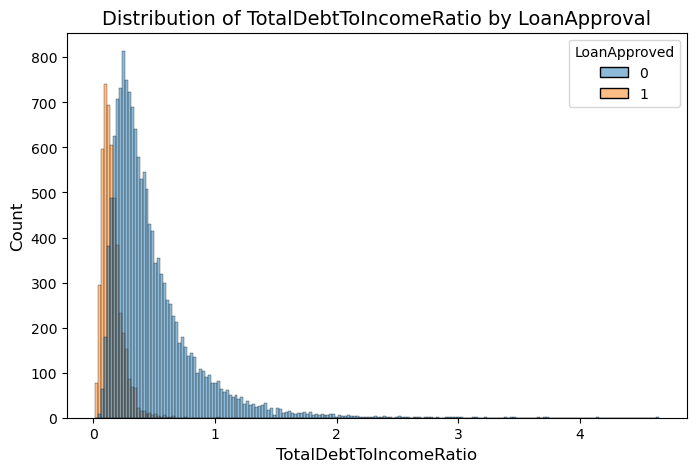

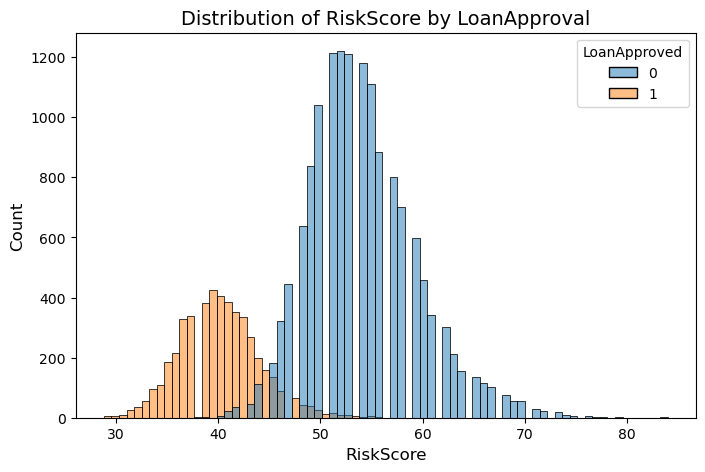

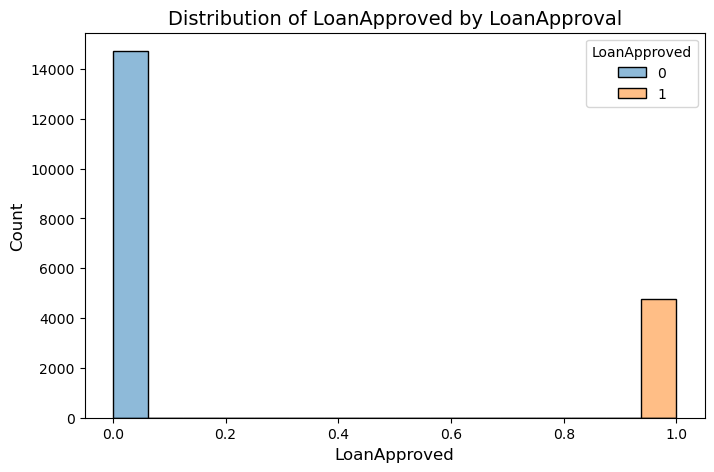

In [101]:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=column, hue='LoanApproved')
    plt.title(f'Distribution of {column} by LoanApproval', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

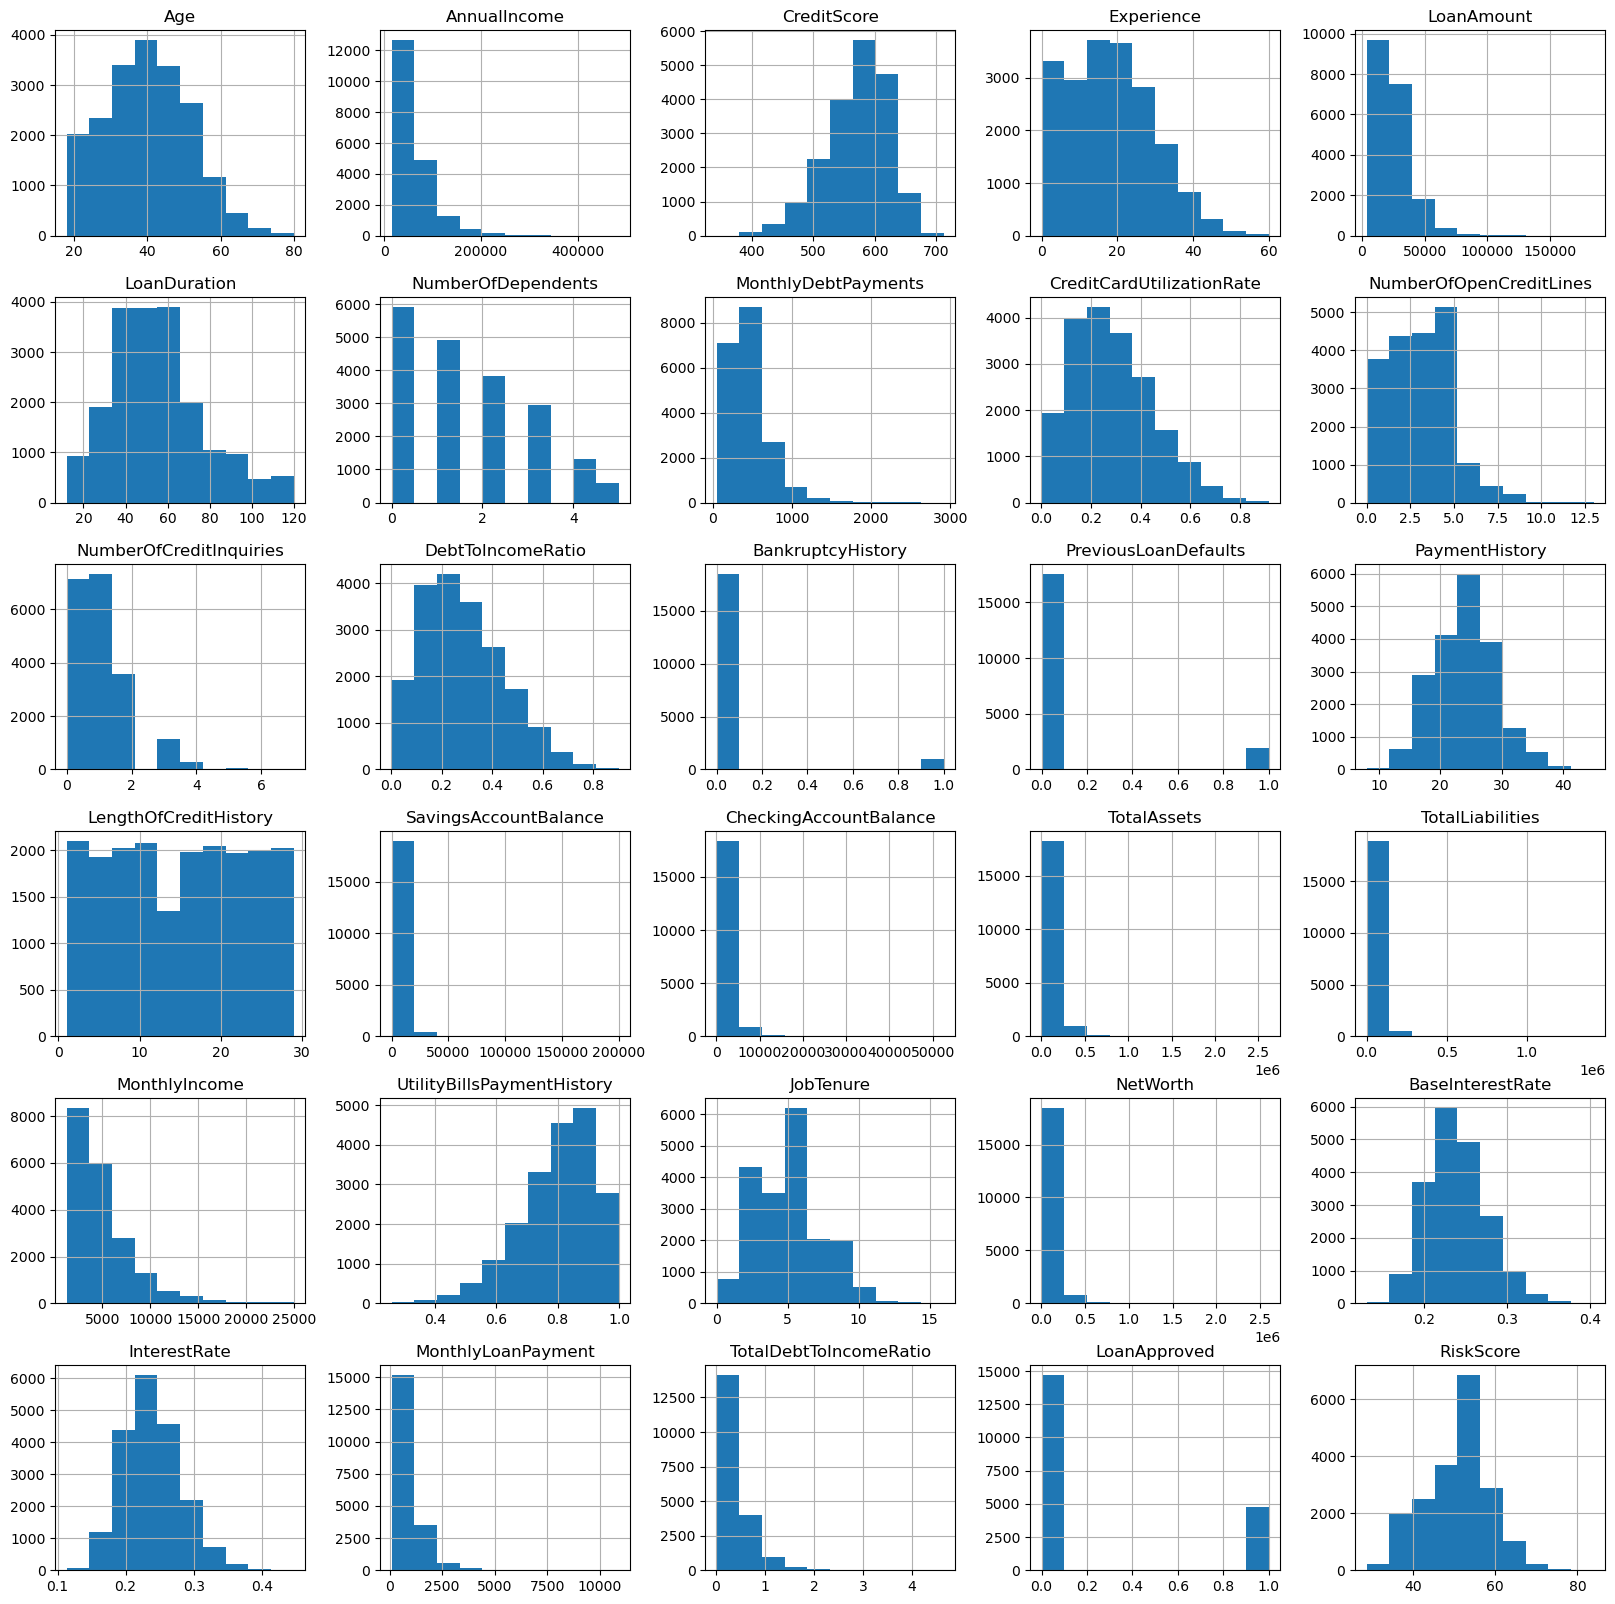

In [102]:
data.hist(figsize= (20 , 20))
plt.show()

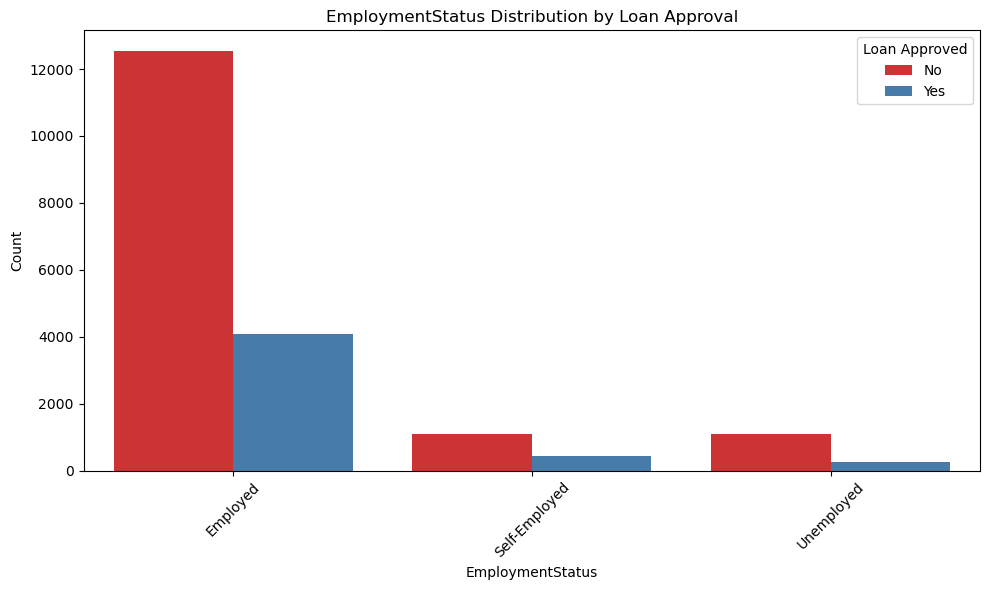

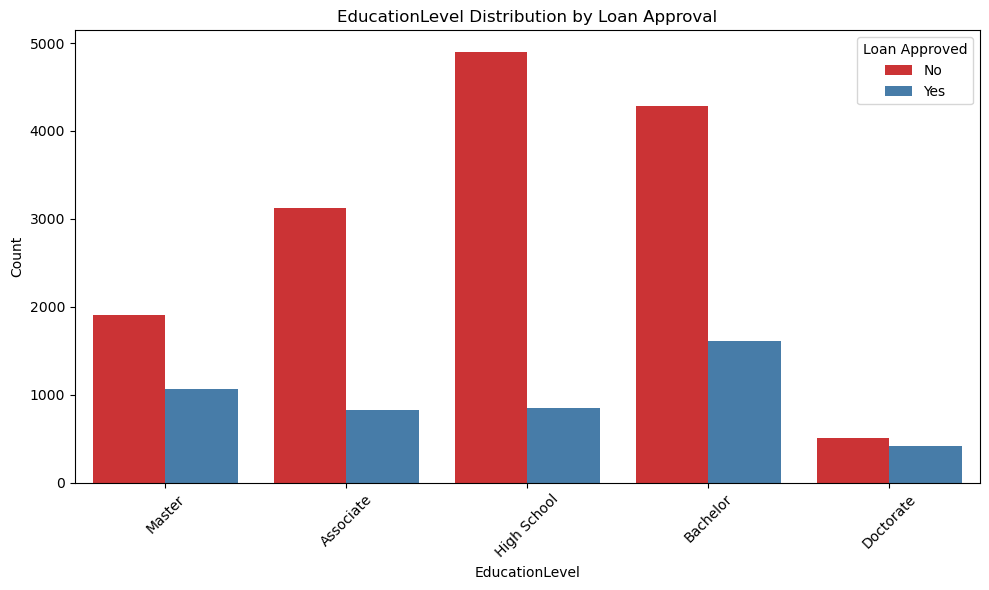

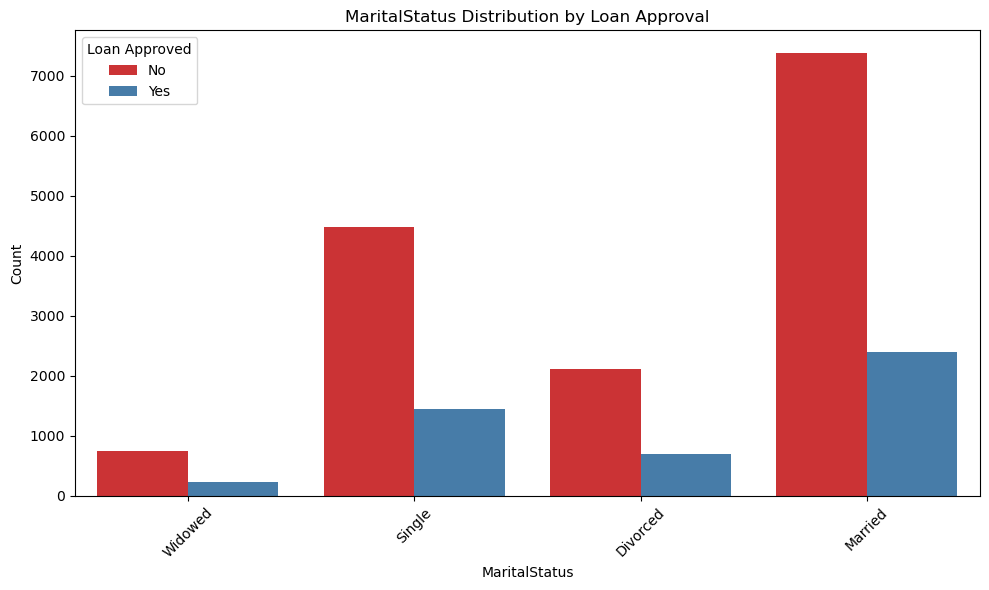

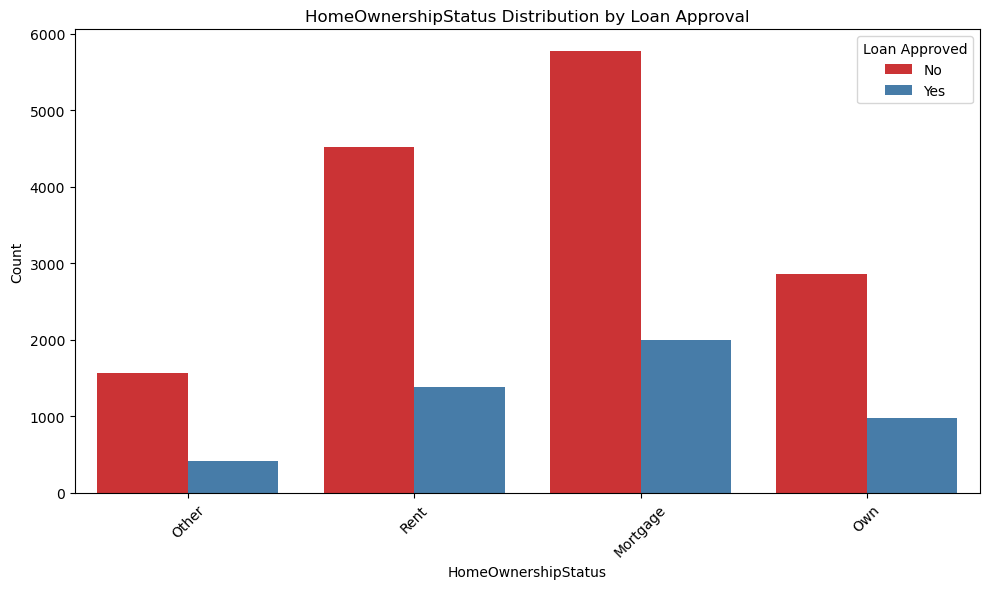

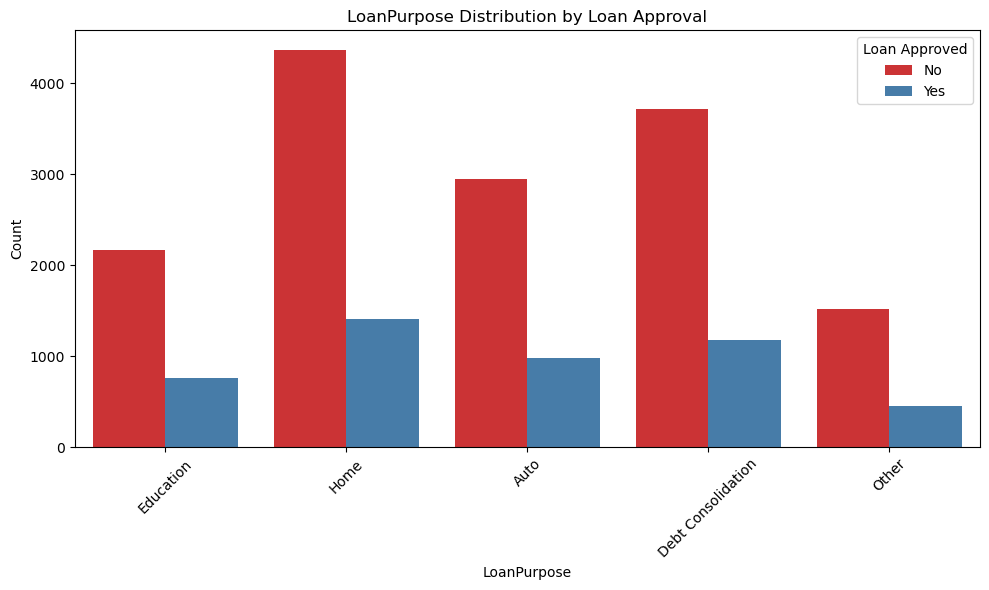

In [103]:
# Loop through each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, hue='LoanApproved', palette='Set1')
    plt.title(f'{column} Distribution by Loan Approval')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-labels if long names
    plt.legend(title='Loan Approved', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

In [104]:
# 'Employment Status', 'Education Level', 'Home Ownership', and 'Purpose' are categorical
label_encoders = {}
for column in ['EmploymentStatus', 'EducationLevel', 'HomeOwnershipStatus', 'LoanPurpose','MaritalStatus']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

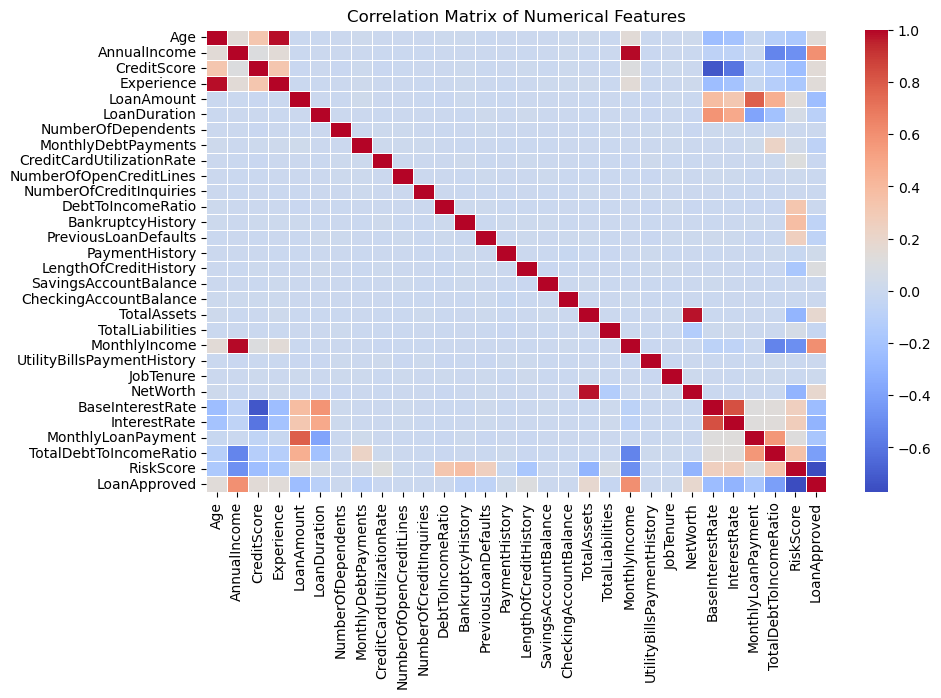

In [105]:
#Features which are most correlated with loan approval
plt.figure(figsize=(10, 6))
corr = data[numerical_columns].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [106]:
# Calculate correlation matrix
correlation = data.corr()

# Set correlation threshold
threshold = 0.8

# Get pairs above threshold but below 1.0 (excluding self-correlations)
high_corr = correlation[(correlation.abs() > threshold) & (correlation.abs() < 1.0)]

#Print the high correlations (non-empty rows and columns)
print("Highly correlated pairs:")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

Highly correlated pairs:
                       Age  AnnualIncome  Experience  TotalAssets  \
Age                    NaN           NaN    0.982992          NaN   
AnnualIncome           NaN           NaN         NaN          NaN   
Experience        0.982992           NaN         NaN          NaN   
TotalAssets            NaN           NaN         NaN          NaN   
MonthlyIncome          NaN      0.989856         NaN          NaN   
NetWorth               NaN           NaN         NaN     0.979222   
BaseInterestRate       NaN           NaN         NaN          NaN   
InterestRate           NaN           NaN         NaN          NaN   

                  MonthlyIncome  NetWorth  BaseInterestRate  InterestRate  
Age                         NaN       NaN               NaN           NaN  
AnnualIncome           0.989856       NaN               NaN           NaN  
Experience                  NaN       NaN               NaN           NaN  
TotalAssets                 NaN  0.979222        

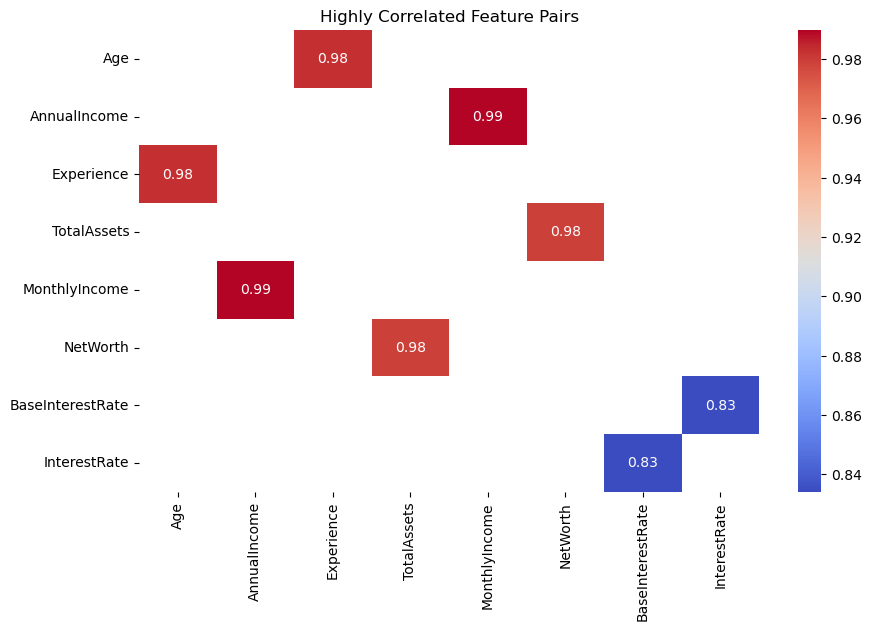

In [107]:
plt.figure(figsize=(10, 6))
sns.heatmap(high_corr.dropna(how='all').dropna(axis=1, how='all'), annot=True, cmap='coolwarm')
plt.title("Highly Correlated Feature Pairs")
plt.show()


In [108]:
data.drop(['Experience', 'MonthlyIncome', 'TotalAssets', 'BaseInterestRate','RiskScore'], axis=1, inplace=True)

In [109]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         19500 non-null  int64  
 1   AnnualIncome                19500 non-null  int64  
 2   CreditScore                 19500 non-null  int64  
 3   EmploymentStatus            19500 non-null  int32  
 4   EducationLevel              19500 non-null  int32  
 5   LoanAmount                  19500 non-null  int64  
 6   LoanDuration                19500 non-null  int64  
 7   MaritalStatus               19500 non-null  int32  
 8   NumberOfDependents          19500 non-null  int64  
 9   HomeOwnershipStatus         19500 non-null  int32  
 10  MonthlyDebtPayments         19500 non-null  int64  
 11  CreditCardUtilizationRate   19500 non-null  float64
 12  NumberOfOpenCreditLines     19500 non-null  int64  
 13  NumberOfCreditInquiries     195

In [110]:
data.shape

(19500, 30)

In [111]:
data.head()


Age  AnnualIncome  CreditScore  EmploymentStatus  EducationLevel  \
0   53         42478          552                 0               4   
1   54         25911          571                 0               0   
2   18         27112          432                 0               4   
3   35         54015          612                 0               3   
4   35         32033          585                 0               1   

   LoanAmount  LoanDuration  MaritalStatus  NumberOfDependents  \
0       10463            72              3                   2   
1       10751            60              2                   4   
2       32743            72              0                   0   
3       13313            60              2                   3   
4       24194            12              0                   2   

   HomeOwnershipStatus  ...  SavingsAccountBalance  CheckingAccountBalance  \
0                    1  ...                   1789                    3632   
1                    3  ...                   4872                     838   
2                    0  ...                  14969                    2120   
3                    0  ...                  13453                     143   
4                    0  ...                   3257                     162   

   TotalLiabilities  UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0             30757                    0.972212          7      5996   
1             65767                    0.841848          5      5576   
2              8253                    0.794940          4     40446   
3              3399                    0.754604          4     77419   
4             80487                    0.910957          5     47295   

   InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  LoanApproved  
0      0.221873          264.059369                0.243249             0  
1      0.244892          312.344769                0.396594             0  
2      0.378836         1157.134465                0.875539             0  
3      0.202899          354.864257                0.145041             0  
4      0.225888         2271.284384                0.963988             0  

[5 rows x 30 columns]

### Dropping target variable

In [113]:
X = data.drop('LoanApproved', axis=1) 
y = data['LoanApproved']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [117]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9507692307692308
Confusion Matrix:
[[2862   89]
 [ 103  846]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2951
           1       0.90      0.89      0.90       949

    accuracy                           0.95      3900
   macro avg       0.94      0.93      0.93      3900
weighted avg       0.95      0.95      0.95      3900



## Feature importance

In [120]:
feature_names = [
    'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
    'EducationLevel', 'LoanAmount', 'LoanDuration', 'MaritalStatus',
    'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments',
    'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
    'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
    'LengthOfCreditHistory', 'SavingsAccountBalance',
    'CheckingAccountBalance', 'TotalLiabilities',
    'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
    'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio'
]

In [121]:
r = len(feature_names)
print(r)

29


In [122]:
#Get coefficients
coefficients = model.coef_[0]
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'AbsCoefficient': abs(coefficients)  # Absolute value for ranking
})
#Sort by absolute coefficient to see most important features
feature_importance_df = feature_importance_df.sort_values(by='AbsCoefficient', ascending=False)

print(feature_importance_df[['Feature', 'Coefficient']])

                       Feature  Coefficient
28      TotalDebtToIncomeRatio    -7.587108
26                InterestRate    -3.844757
1                 AnnualIncome     3.267920
25                    NetWorth     2.238654
2                  CreditScore    -1.538636
5                   LoanAmount    -1.279700
19       LengthOfCreditHistory     1.230457
15           BankruptcyHistory    -1.053491
17        PreviousLoanDefaults    -0.817664
27          MonthlyLoanPayment     0.444661
18              PaymentHistory     0.343476
3             EmploymentStatus    -0.322100
0                          Age     0.292821
9          HomeOwnershipStatus    -0.277189
4               EducationLevel     0.155077
10         MonthlyDebtPayments     0.112847
20       SavingsAccountBalance     0.097365
22            TotalLiabilities    -0.051616
12     NumberOfOpenCreditLines     0.049463
14           DebtToIncomeRatio    -0.046063
23  UtilityBillsPaymentHistory     0.038123
21      CheckingAccountBalance  

In [123]:
top_n = 15
top_features = feature_importance_df.head(top_n)['Feature'].tolist()
print("Top 15 features:", top_features)

Top 15 features: ['TotalDebtToIncomeRatio', 'InterestRate', 'AnnualIncome', 'NetWorth', 'CreditScore', 'LoanAmount', 'LengthOfCreditHistory', 'BankruptcyHistory', 'PreviousLoanDefaults', 'MonthlyLoanPayment', 'PaymentHistory', 'EmploymentStatus', 'Age', 'HomeOwnershipStatus', 'EducationLevel']


In [124]:
def select_top_features(X, feature_names, top_features):
    top_feature_indices = [feature_names.index(feature) for feature in top_features]
    return X[:, top_feature_indices]
# Usage
X_train_selected = select_top_features(X_train, feature_names, top_features)
X_test_selected = select_top_features(X_test, feature_names, top_features)


In [125]:
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

In [126]:
# Retrain model
model = LogisticRegression()
model.fit(X_train_selected , y_train)

LogisticRegression()

In [127]:
print("New Accuracy:", model.score(X_test_selected, y_test))
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

New Accuracy: 0.9492307692307692
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2951
           1       0.90      0.89      0.89       949

    accuracy                           0.95      3900
   macro avg       0.93      0.93      0.93      3900
weighted avg       0.95      0.95      0.95      3900

Confusion Matrix:
 [[2860   91]
 [ 107  842]]


# Random forest

In [154]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [155]:
y_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Results:
Accuracy: 0.9233333333333333
Confusion Matrix:
 [[2840  111]
 [ 188  761]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2951
           1       0.87      0.80      0.84       949

    accuracy                           0.92      3900
   macro avg       0.91      0.88      0.89      3900
weighted avg       0.92      0.92      0.92      3900



### GRIDSEARCH FOR SVC

In [78]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [79]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')


In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)
# Best estimator
best_rf = grid_search.best_estimator_
# Predict and evaluate
y_pred_best = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# SVC

In [89]:
svc_model = SVC(kernel='rbf', random_state=42) 
svc_model.fit(X_train_selected, y_train)

SVC(random_state=42)

In [90]:
y_pred = svc_model.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9538461538461539
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2951
           1       0.91      0.90      0.90       949

    accuracy                           0.95      3900
   macro avg       0.94      0.93      0.94      3900
weighted avg       0.95      0.95      0.95      3900



### GRIDSEARCH FOR SVC

In [95]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'gamma': ['scale', 'auto'],   # Kernel coefficient
    'kernel': ['linear', 'rbf']   # Kernel type
}

In [ ]:
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_selected)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC curve

In [79]:
# Logistic Regression probabilities
y_pred_proba_lr = model.predict_proba(X_test_selected)[:, 1]
# Random Forest probabilities
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
# SVM probabilities (only if you initialized with probability=True)
y_pred_proba_svm = best_svm.predict_proba(X_test_selected)[:, 1]

NameError: name 'best_rf' is not defined

In [ ]:
# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

# AUC scores
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

# Chart formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [160]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [178]:
#XGBoost
from xgboost import XGBClassifier
# Create XGBoost model
xgb_model = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_pred = xgb_model.predict(X_test)

# Print classification report
print("Classification Report of XGBoost:\n")
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precison : {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

Classification Report of XGBoost:

              precision    recall  f1-score   support

    Rejected       0.97      0.97      0.97      2951
    Approved       0.90      0.89      0.90       949

    accuracy                           0.95      3900
   macro avg       0.93      0.93      0.93      3900
weighted avg       0.95      0.95      0.95      3900

Accuracy : 0.9503
Precison : 0.9012
Recall   : 0.8936
F1 Score : 0.8974


In [81]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [196]:
import lime
import lime.lime_tabular

# number of features from your data
num_features = X_train_selected.shape[1]
feature_names = [f"Feature_{i}" for i in range(num_features)]  # fallback names

# -----------------------------
# 1. Logistic Regression Explainer
# -----------------------------
log_reg_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_selected,
    feature_names=feature_names,
    class_names=['Rejected', 'Approved'],
    mode='classification'
)

log_reg_exp = log_reg_explainer.explain_instance(
    X_test_selected[0],       # first test sample (already numpy row)
    model.predict_proba,      # logistic regression model
    num_features=10
)
print("Logistic Regression Explanation")
log_reg_exp.show_in_notebook(show_table=True)

# -----------------------------
# 2. Random Forest Explainer
# -----------------------------
rf_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,   # full 29 features
    feature_names=[f"Feature_{i}" for i in range(X_train.shape[1])],
    class_names=['Rejected', 'Approved'],
    mode='classification'
)

rf_exp = rf_explainer.explain_instance(
    X_test[0],               # use row with 29 features
    rf_model.predict_proba,
    num_features=10
)

print("Random Forest Explanation")
rf_exp.show_in_notebook(show_table=True)


Logistic Regression Explanation


Random Forest Explanation
